# Content-Based Recommender


The system uses your features and likes in order to recommend you with things that you might like. It uses the information provided by you over the internet and the ones they are able to gather and then they curate recommendations according to that.

lets import libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
movies = pd.read_csv('movies.csv')

In [48]:

movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [49]:

movies.shape

(9742, 3)

In [50]:

# create a function to create a table showing the numbers of missing values for each feature
def create_missing_df(dataframe):
    missing_index = dataframe.columns.tolist() 
    missing = dataframe.isnull().sum().tolist()
    missing_df = pd.DataFrame({'Missing':missing}, index=missing_index)
    return missing_df

In [51]:
create_missing_df(movies)


,Missing
movieId,0
title,0
genres,0


In [52]:
# the function to extract titles
def extract_title(title):
    year = title[len(title)-5:len(title)-1]

  # some movies do not have the info about year in the column title. So, we should take care of the case as well.
    if year.isnumeric():
        title_no_year = title[:len(title)-7]
        return title_no_year
    else:
        return title

In [53]:
# the function to extract years
def extract_year(title):
    year = title[len(title)-5:len(title)-1]

  # some movies do not have the info about year in the column title. So, we should take care of the case as well.
    if year.isnumeric():
        return int(year)
    else:
        return np.nan

In [54]:
movies.rename(columns={'title':'title_year'}, inplace=True) # change the column name from title to title_year
movies['title_year'] = movies['title_year'].apply(lambda x: x.strip()) # remove leading and ending whitespaces in title_year
movies['title'] = movies['title_year'].apply(extract_title) # create the column for title
movies['year'] = movies['title_year'].apply(extract_year) # create the column for year

In [55]:
create_missing_df(movies)

,Missing
movieId,0
title_year,0
genres,0
title,0
year,12


# Explore Generers

In [56]:
r,c = movies[movies['genres']=='(no genres listed)'].shape 
print('The number of movies which do not have info about genres:',r)

The number of movies which do not have info about genres: 34


In [57]:
movies = movies[~(movies['genres']=='(no genres listed)')].reset_index(drop=True)

In [58]:
movies[['title','genres']].head(5)

,title,genres
0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji,Adventure|Children|Fantasy
2,Grumpier Old Men,Comedy|Romance
3,Waiting to Exhale,Comedy|Drama|Romance
4,Father of the Bride Part II,Comedy


In [59]:
# remove '|' in the genres column
movies['genres'] = movies['genres'].str.replace('|',' ')

C:\Users\Taimoor M Gondal\AppData\Local\Temp\ipykernel_13956\159315278.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['genres'] = movies['genres'].str.replace('|',' ')


In [60]:
# count the number of occurences for each genre in the data set
counts = dict()

for i in movies.index:
    for g in movies.loc[i,'genres'].split(' '):
        if g not in counts:
            counts[g] = 1
    else:
        counts[g] = counts[g] + 1


Text(0, 0.5, 'Counts')

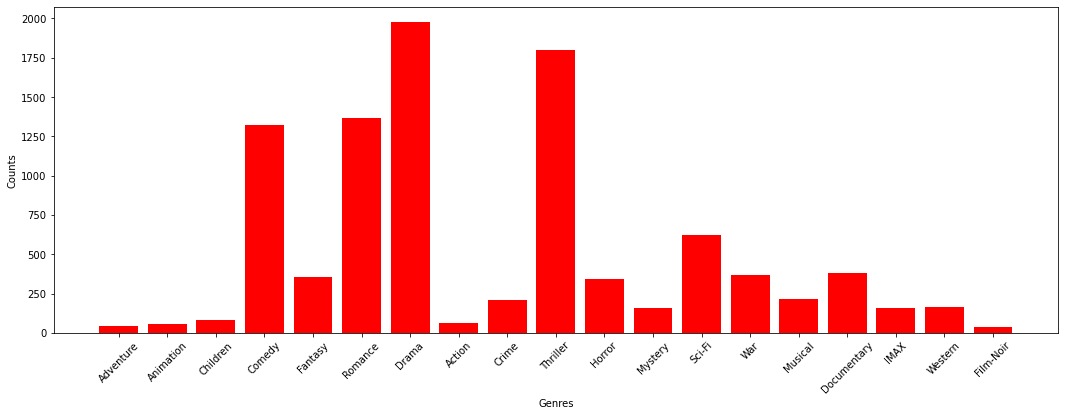

In [61]:
plt.figure(figsize=(18,6))
plt.bar(list(counts.keys()), counts.values(), color='r')
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Counts')

# Term Frequency and Inverse Document Frequency (tf-idf)

TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

1. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

2. It has many uses, most importantly in automated text analysis, and is very useful for scoring words in machine learning algorithms for Natural Language Processing (NLP).

3. TF-IDF was invented for document search and information retrieval. It works by increasing proportionally to the number of times a word appears in a document, but is offset by the number of documents that contain the word. So, words that are common in every document, such as this, what, and if, rank low even though they may appear many times, since they don’t mean much to that document in particular.

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
movies['genres'] = movies['genres'].str.replace('Sci-Fi','SciFi')
movies['genres'] = movies['genres'].str.replace('Film-Noir','Noir')

In [64]:
tfidf_vector = TfidfVectorizer(stop_words='english') # create an object for TfidfVectorizer
tfidf_matrix = tfidf_vector.fit_transform(movies['genres']) # apply the object to the genres column

In [65]:
print(list(enumerate(tfidf_vector.get_feature_names())))

[(0, 'action'), (1, 'adventure'), (2, 'animation'), (3, 'children'), (4, 'comedy'), (5, 'crime'), (6, 'documentary'), (7, 'drama'), (8, 'fantasy'), (9, 'horror'), (10, 'imax'), (11, 'musical'), (12, 'mystery'), (13, 'noir'), (14, 'romance'), (15, 'scifi'), (16, 'thriller'), (17, 'war'), (18, 'western')]


C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [66]:
print(tfidf_matrix[:5])


  (0, 8)	0.48301747178653426
  (0, 4)	0.26738777563975086
  (0, 3)	0.5048957307474672
  (0, 2)	0.5162876752057701
  (0, 1)	0.41680359510322523
  (1, 8)	0.5936766667075072
  (1, 3)	0.6205672299106341
  (1, 1)	0.5122932056626417
  (2, 14)	0.8211549883098352
  (2, 4)	0.5707052524498741
  (3, 7)	0.46621627821471856
  (3, 14)	0.7264518207332316
  (3, 4)	0.5048862585582906
  (4, 4)	1.0


In [67]:
tfidf_matrix.shape


(9708, 19)

In [68]:
# the first row vector of tfidf_matrix (Toy Story)
tfidf_matrix.todense()[0]

matrix([[0.        , 0.4168036 , 0.51628768, 0.50489573, 0.26738778,
         0.        , 0.        , 0.        , 0.48301747, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ]])

In [69]:
from sklearn.metrics.pairwise import linear_kernel


In [70]:

sim_matrix = linear_kernel(tfidf_matrix,tfidf_matrix) # create the cosine similarity matrix
print(sim_matrix)

[[1.         0.8136036  0.15259961 ... 0.         0.42114166 0.26738778]
 [0.8136036  1.         0.         ... 0.         0.         0.        ]
 [0.15259961 0.         1.         ... 0.         0.         0.57070525]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.42114166 0.         0.         ... 0.         1.         0.        ]
 [0.26738778 0.         0.57070525 ... 0.         0.         1.        ]]


# Make the Recommendation Engine

In [71]:
# the function to convert from index to title_year
def get_title_year_from_index(index):
    return movies[movies.index == index]['title_year'].values[0]

# the function to convert from title to index
def get_index_from_title(title):

    return movies[movies.title == title].index.values[0]

# Did You Mean

In [74]:
!pip install fuzzywuzzy

In [75]:
from fuzzywuzzy import fuzz

C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [76]:
# create a function to find the closest title
def matching_score(a,b):
    return fuzz.ratio(a,b)

In [77]:

# a function to convert index to title
def get_title_from_index(index):

    return movies[movies.index == index]['title'].values[0]

In [78]:
# the function to return the most similar title to the words a user types
def find_closest_title(title):
    leven_scores = list(enumerate(movies['title'].apply(matching_score, b=title)))
    sorted_leven_scores = sorted(leven_scores, key=lambda x: x[1], reverse=True)
    closest_title = get_title_from_index(sorted_leven_scores[0][0])
    distance_score = sorted_leven_scores[0][1]
    return closest_title, distance_score

# Recommend Movie

In [79]:
def contents_based_recommender(movie_user_likes, how_many):
    closest_title, distance_score = find_closest_title(movie_user_likes)
    if distance_score == 100:
        movie_index = get_index_from_title(closest_title)
        movie_list = list(enumerate(sim_matrix[int(movie_index)]))
        similar_movies = list(filter(lambda x:x[0] != int(movie_index), sorted(movie_list,key=lambda x:x[1], reverse=True))) # remove the typed movie itself

        print('Here\'s the list of movies similar to '+'\033[1m'+str(closest_title)+'\033[0m'+'.\n')

    for i,s in similar_movies[:how_many]: 
        print(get_title_year_from_index(i))

In [82]:
contents_based_recommender('Jumanji', 20)


Here's the list of movies similar to Jumanji.

Indian in the Cupboard, The (1995)
NeverEnding Story III, The (1994)
Escape to Witch Mountain (1975)
Darby O'Gill and the Little People (1959)
Return to Oz (1985)
NeverEnding Story, The (1984)
NeverEnding Story II: The Next Chapter, The (1990)
Santa Claus: The Movie (1985)
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)
Bridge to Terabithia (2007)
Golden Compass, The (2007)
Water Horse: Legend of the Deep, The (2007)
Chronicles of Narnia: Prince Caspian, The (2008)
Alice in Wonderland (1933)
Chronicles of Narnia: The Voyage of the Dawn Treader, The (2010)
Percy Jackson: Sea of Monsters (2013)
Seventh Son (2014)
The Cave of the Golden Rose (1991)
Pan (2015)
